In [1]:
from dense import Dense
from activations import *
import numpy as np
from losses import mse, mse_prime

import bisect
from sklearn import preprocessing



import os
import pandas as pd
from parameters import *
import copy
import regex as re
import matplotlib.pyplot as plt

In [2]:

os.chdir('C:\\Users\\91993\\Desktop\\chaos\\')
home_path = os.getcwd()
saved_path = home_path
saved_path



'C:\\Users\\91993\\Desktop\\chaos'

In [3]:
initialization_list = [i for i in range(1,10)]

In [4]:
def visualize_weights(network):
    for items in network:
        if items.__class__.__name__ == 'Dense':
            print(items.weights)
            print(items.bias)


def mask_weights(network,mask_list,weights_per_layer):
    if len(mask_list)!=0:
        for mask in mask_list:
            index = bisect.bisect_left(weights_per_layer,mask)
            shape_ = network[2*index].weights.shape


            if index!=0:
                mask = mask - weights_per_layer[index-1]


            network[2*index].weights[(mask-1)//shape_[1]][(mask-1)%shape_[1]] = 0




def predict(network, input,store_weights=False,list_w=[],list_b=[]):
    output = input
    for layer in network:
        if layer.__class__.__name__ =='Dense' and store_weights==True:
            output = layer.forward(output)
            list_w.append(np.copy(layer.weights))
            list_b.append(np.copy(layer.bias))
        else :
            output = layer.forward(output)


    return output

def get_accuracy(network,X_t,Y_t):
    correct = 0
    for x, y in zip(X_t, Y_t):
        output = predict(network, x,store_weights=False)
        if np.argmax(output)==np.argmax(y):
            correct +=1

    return correct

def train(network, loss, loss_prime, x_train, y_train,x_test,y_test, epochs = 1000, learning_rate = 0.01, verbose = True,store_weights=False,mask_weight=False,mask_list=[],weights_per_layer=[],list_w=[],list_b=[]):
    test_acc = []
    train_acc = []
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            if mask_weight:
                mask_weights(network,mask_list=mask_list,weights_per_layer=weights_per_layer)
                
            if store_weights :
                output = predict(network, x,store_weights=store_weights,list_w=list_w,list_b=list_b)
            else:
                output = predict(network,x,store_weights=False)
            # print(output)
            # print(y)
            # print("")
            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

            

            if store_weights:
                train_accuracy = get_accuracy(network,x_train,y_train)
                accuracy = get_accuracy(network,x_test,y_test)
                test_acc.append(accuracy/x_test.shape[0])
                train_acc.append(train_accuracy/x_train.shape[0])

        if store_weights!=True:
            train_accuracy = get_accuracy(network,x_train,y_train)
            accuracy = get_accuracy(network,x_test,y_test)
            test_acc.append(accuracy/x_test.shape[0])
            train_acc.append(train_accuracy/x_train.shape[0])
                
        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")
        

    return train_acc,test_acc

def visualize(train_acc,test_acc):
    plt.plot(train_acc[:])
    plt.plot(test_acc[:])
    plt.legend(['train','test'])
    plt.show()

In [5]:
network_list = []

In [6]:
for init in initialization_list:
    home_path = saved_path
    os.chdir(home_path)
    path = home_path+'\\NN-RESULTS-FINAL\\datasets'
    datasets_path = os.path.join(path,"data")
    init_path = os.path.join(path,"initializations")
    os.chdir(datasets_path)


    datasets = os.listdir()

    #-----------------------------control------------------------------#
    data_curr = "binary_sonar"
    initialization = init
    new_init = True
    #------------------------------------------------------------------#


    #----------------------------------------------------------------------------------------#
    init_path = os.path.join(path,"initializations")
    path_initializations = f'{init_path}\\{data_curr}'
    try:
        list_init = os.listdir(path_initializations)
    except:
        os.mkdir(path_initializations)
        list_init = os.listdir(path_initializations)

    numbers = []

    print(list_init)

    for items in list_init:
        if(re.search(f'{data_curr}',items)):
            str_temp = items.split("-")[1]
            numbers.append(int(str_temp.split(".")[0]))




    if numbers.__contains__(initialization) and new_init:
        new_init = False
        print("initialization already exists")
    else:
        if len(numbers)==0:
            initialization = 1
        else:
            initialization = numbers[-1]+1

    #====================Data and Network Initialization======================================#
    params = parameter_file(data_curr,path,initialization,new_init)

    lr = params['learning_rate'] 
    epochs = params['num_epochs'] 
    loss = globals()[params['loss']]
    loss_prime = globals()[params['loss']+'_prime']
    network = params['network']
    network_list.append(network)
    start_weights = params['init']

    X_train,Y_train,X_test,Y_test = params['data']
    #=========================================================================================#
    if new_init:
        init_path = os.path.join(path,"initializations")
        try:
            os.mkdir(f'{init_path}\\{data_curr}')

        except:
            print("")

        path_new_init = f'{init_path}\\{data_curr}\\{data_curr}-{initialization}.npy'
        np.save(path_new_init,start_weights)

    weights_per_layer = []

    for items in network:
        if items.__class__.__name__ == 'Dense':
            weights_per_layer.append(items.weights.shape[0]*items.weights.shape[1])


    sum_ = weights_per_layer[0]
    for i in range(1,len(weights_per_layer)):
        sum_ += weights_per_layer[i]
        weights_per_layer[i] = sum_

[]

['binary_sonar-1.npy']

['binary_sonar-1.npy', 'binary_sonar-2.npy']

['binary_sonar-1.npy', 'binary_sonar-2.npy', 'binary_sonar-3.npy']

['binary_sonar-1.npy', 'binary_sonar-2.npy', 'binary_sonar-3.npy', 'binary_sonar-4.npy']

['binary_sonar-1.npy', 'binary_sonar-2.npy', 'binary_sonar-3.npy', 'binary_sonar-4.npy', 'binary_sonar-5.npy']

['binary_sonar-1.npy', 'binary_sonar-2.npy', 'binary_sonar-3.npy', 'binary_sonar-4.npy', 'binary_sonar-5.npy', 'binary_sonar-6.npy']


c:\Users\91993\Desktop\chaos\parameters.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stored_weights = np.asarray(stored_weights);
c:\Users\91993\Desktop\chaos\parameters.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stored_weights = np.asarray(stored_weights);
c:\Users\91993\Desktop\chaos\parameters.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob


['binary_sonar-1.npy', 'binary_sonar-2.npy', 'binary_sonar-3.npy', 'binary_sonar-4.npy', 'binary_sonar-5.npy', 'binary_sonar-6.npy', 'binary_sonar-7.npy']

['binary_sonar-1.npy', 'binary_sonar-2.npy', 'binary_sonar-3.npy', 'binary_sonar-4.npy', 'binary_sonar-5.npy', 'binary_sonar-6.npy', 'binary_sonar-7.npy', 'binary_sonar-8.npy']



c:\Users\91993\Desktop\chaos\parameters.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stored_weights = np.asarray(stored_weights);
c:\Users\91993\Desktop\chaos\parameters.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stored_weights = np.asarray(stored_weights);


In [18]:
df_train_sparse = {f'{init}':[]for init in initialization_list}
df_test_sparse = {f'{init}':[]for init in initialization_list}
df_train_epoch = {f'{init}':[]for init in initialization_list}
df_test_epoch = {f'{init}':[]for init in initialization_list}

In [54]:
visualize_weights(network_list[8])

[[ 2.66986214e-01  2.90237530e+00  3.35050154e-01 -1.26220473e+00
  -1.26366966e+00 -1.05610444e+00 -1.17211992e+00 -1.28515263e+00
  -1.58214636e+00 -2.15994744e+00 -1.06315349e+00  8.74267262e-01
  -5.36280468e-02  1.90538112e+00 -1.11789034e+00 -3.33936474e+00
  -2.85756340e+00  1.41954711e+00  1.37112060e+00 -2.20635760e-01
   1.08635476e+00  3.11420329e-01 -2.59524792e-01 -6.92904650e-01
  -1.74734149e+00  2.38715467e-01 -2.50442003e+00 -1.24622810e+00
  -7.60125463e-03 -1.31111133e+00  1.36640460e+00  9.24816442e-01
   7.31054786e-01 -2.31304600e+00  8.77643803e-01  6.33218878e-01
   1.68306312e+00 -5.49862804e-01 -1.34134466e+00 -2.17008026e-01
   7.26386029e-01  1.87321020e+00  1.57468410e+00  3.98561871e-01
  -2.69908369e-01 -1.91052429e+00 -3.51836982e-01  5.46849589e-01
  -1.12603382e+00  7.56784215e-01 -1.12625820e+00 -1.06564426e+00
   1.69639860e+00  1.26428709e-01  6.02445596e-01  1.71813377e+00
  -1.92111070e-01  1.01076529e+00  6.08215236e-01  1.34587949e+00]
 [ 1.4407

In [52]:

network = np.copy(network_list[8])
initialization = 1
# train_sparse, test_sparse = train(network, loss,loss_prime,X_train,Y_train,X_test,Y_test,epochs=epochs,learning_rate=lr,verbose=False,store_weights=False,mask_weight=True,mask_list=mask_list,weights_per_layer=weights_per_layer)
# network = initialize_Weights(network,params['init'])
train_acc, test_acc = train(network, loss,loss_prime,X_train,Y_train,X_test,Y_test,epochs=50,learning_rate=0.2,verbose=False,store_weights=False,mask_weight=False,mask_list=[],weights_per_layer=weights_per_layer)
# df_test_sparse[f'{initialization}'] = test_sparse
df_test_epoch[f'{initialization}'] = test_acc

# df_train_sparse[f'{initialization}'] = train_sparse
df_train_epoch[f'{initialization}'] = train_acc

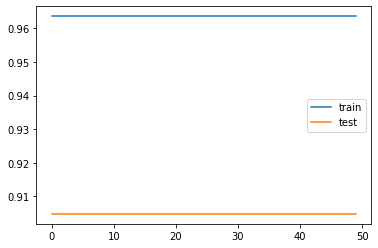

In [53]:
visualize(df_train_epoch[f'{initialization}'],df_test_epoch[f'{initialization}'])

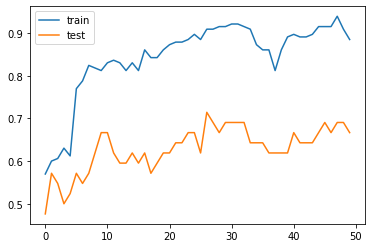

In [22]:
visualize(df_train_epoch[f'{initialization}'],df_test_epoch[f'{initialization}'])

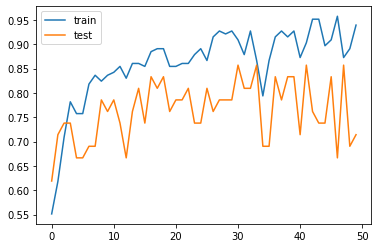

In [24]:
visualize(df_train_epoch[f'{initialization}'],df_test_epoch[f'{initialization}'])